In [ ]:
# ÏΩîÎìú ÏÑ§Î™Ö
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

# ÎûúÎç§Ìïú ÏàòÏùµÎ•† Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(Volatility Clustering)ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ARCH/GARCH Î™®Ìòï Ï†ÅÌï©Ïù¥ Ïú†Ïö©ÌïòÎèÑÎ°ù ÎßåÎì¶.
# ARCH Î™®Ìòï Ï†ÅÌï©

# arch_model Ìï®ÏàòÎ°ú ARCH(1) Î™®ÌòïÏùÑ Ï†ÅÌï©Ìï©ÎãàÎã§.
# vol="ARCH"Î°ú Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ÏùÑ ARCH ÌòïÌÉúÎ°ú ÏÑ§Ï†ï.
# GARCH Î™®Ìòï Ï†ÅÌï©

# arch_model Ìï®ÏàòÎ°ú GARCH(1,1) Î™®ÌòïÏùÑ Ï†ÅÌï©Ìï©ÎãàÎã§.
# vol="Garch"Î°ú Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ÏùÑ GARCH ÌòïÌÉúÎ°ú ÏÑ§Ï†ï.
# Í≤∞Í≥º ÏöîÏïΩ

# Í∞Å Î™®ÌòïÏùò Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÏó¨ Ï£ºÏöî ÌÜµÍ≥ÑÎüâÍ≥º Î™®Ïàò Í∞íÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
# Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ ÏãúÍ∞ÅÌôî

# ARCHÏôÄ GARCH Î™®ÌòïÏúºÎ°ú Ï∂îÏ†ïÎêú Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎπÑÍµêÌï©ÎãàÎã§.


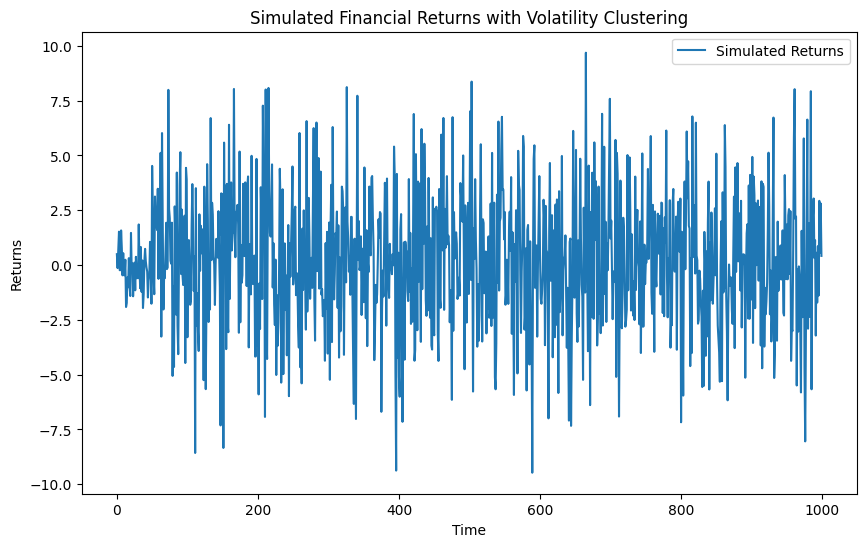

ARCH(1) Model Results:

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2529.06
Distribution:                  Normal   AIC:                           5064.12
Method:            Maximum Likelihood   BIC:                           5078.84
                                        No. Observations:                 1000
Date:                Tue, Dec 03 2024   Df Residuals:                      999
Time:                        13:39:48   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2120  9.585e-02      2.

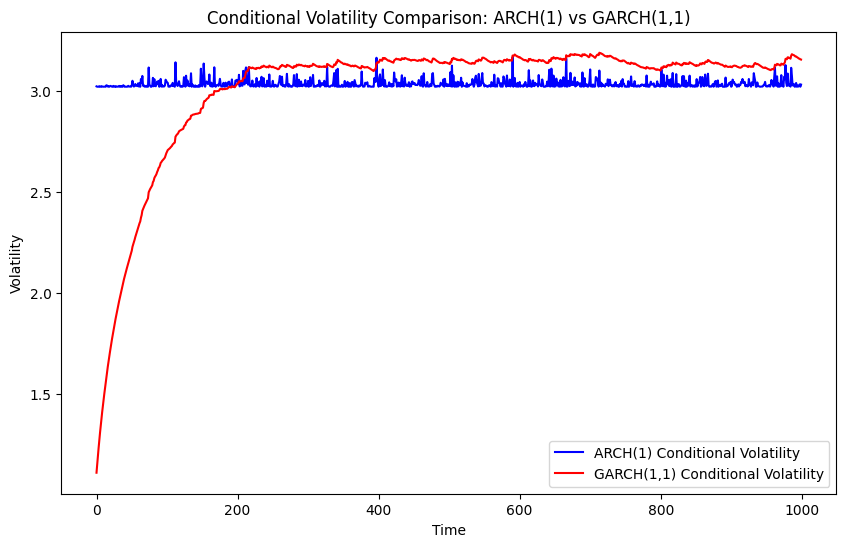

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# 1. Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (ÎûúÎç§ Í∏àÏúµ ÏàòÏùµÎ•† ÏãúÎÆ¨Î†àÏù¥ÏÖò)
np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n)  # Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÏàòÏùµÎ•† ÏÉùÏÑ±
for i in range(1, n):
    if i % 50 == 0:  # Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï∂îÍ∞Ä
        returns[i:i+50] += np.random.normal(0, 3, 50)

# pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
returns_df = pd.DataFrame(returns, columns=["returns"])

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(returns_df, label="Simulated Returns")
plt.title("Simulated Financial Returns with Volatility Clustering")
plt.xlabel("Time")
plt.ylabel("Returns")
plt.legend()
plt.show()

# 2. ARCH Î™®Ìòï Ï†ÅÌï©
arch_model_instance = arch_model(returns_df["returns"], vol="ARCH", p=1)  # ARCH(1) Î™®Îç∏
arch_results = arch_model_instance.fit(disp="off")  # Î™®Ìòï Ï†ÅÌï©
print("ARCH(1) Model Results:\n")
print(arch_results.summary())

# 3. GARCH Î™®Ìòï Ï†ÅÌï©
garch_model_instance = arch_model(returns_df["returns"], vol="Garch", p=1, q=1)  # GARCH(1,1) Î™®Îç∏
garch_results = garch_model_instance.fit(disp="off")  # Î™®Ìòï Ï†ÅÌï©
print("\nGARCH(1,1) Model Results:\n")
print(garch_results.summary())

# 4. Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ ÏãúÍ∞ÅÌôî (ARCHÏôÄ GARCH ÎπÑÍµê)
plt.figure(figsize=(10, 6))
plt.plot(arch_results.conditional_volatility, label="ARCH(1) Conditional Volatility", color="blue")
plt.plot(garch_results.conditional_volatility, label="GARCH(1,1) Conditional Volatility", color="red")
plt.title("Conditional Volatility Comparison: ARCH(1) vs GARCH(1,1)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()


1. ARCH Î™®Ìòï Í≤∞Í≥º Ìï¥ÏÑù
ARCH Î™®ÌòïÏùÄ Í≥ºÍ±∞ Ïò§Ï∞®(ÏûîÏ∞®) Ï†úÍ≥±Í∞íÏóê Í∏∞Î∞òÌï¥ ÌòÑÏû¨ ÏãúÏ†êÏùò Î≥ÄÎèôÏÑ±ÏùÑ Ï∂îÏ†ïÌï©ÎãàÎã§.

Í≤∞Í≥º ÏöîÏïΩ
ARCH(1) Î™®Ìòï Ï†ÅÌï© Í≤∞Í≥ºÏóêÏÑú Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∞íÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§:

Î™®Ïàò(Parameter):ùõº0 : Í∏∞Î≥∏Ï†ÅÏù∏ Î∂ÑÏÇ∞ ÏàòÏ§Ä(ÏÉÅÏàòÌï≠).
ùõº1 : Í≥ºÍ±∞ Ïò§Ï∞® Ìï≠(ùúñùë°‚àí12 )Ïù¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•.
Ìï¥ÏÑù
ùõº0>0 : Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞Ïù¥ Ìï≠ÏÉÅ ÏñëÏàòÏûÑÏùÑ Î≥¥Ïû•.
ùõº1>0: Í≥ºÍ±∞ Ï∂©Í≤©(Ïò§Ï∞® Ï†úÍ≥±)Ïù¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî Ï†ïÎèÑ.
ùõº1 Ïù¥ ÌÅ¥ÏàòÎ°ù Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ Í∞ïÌïòÍ≤å ÎÇòÌÉÄÎÇ®.

2. GARCH Î™®Ìòï Í≤∞Í≥º Ìï¥ÏÑù

GARCH Î™®ÌòïÏùÄ Í≥ºÍ±∞ Ïò§Ï∞®ÏôÄ Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞ Î™®ÎëêÎ•º Í≥†Î†§Ìï¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±ÏùÑ Ï∂îÏ†ïÌï©ÎãàÎã§.

GARCHÎäî ARCHÎ≥¥Îã§ Îçî Î∂ÄÎìúÎüΩÍ≥† ÌòÑÏã§Ï†ÅÏù∏ Î≥ÄÎèôÏÑ±ÏùÑ Î™®Îç∏ÎßÅÌï† Ïàò ÏûàÏäµÎãàÎã§.

Í≤∞Í≥º ÏöîÏïΩ
GARCH(1,1) Î™®Ìòï Ï†ÅÌï© Í≤∞Í≥ºÏóêÏÑú Îã§Ïùå Í∞íÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§:
Î™®Ïàò(Parameter):ùõº0 : Í∏∞Î≥∏Ï†ÅÏù∏ Î∂ÑÏÇ∞ ÏàòÏ§Ä.
ùõº1 : Í≥ºÍ±∞ Ïò§Ï∞® Ìï≠(ùúñùë°‚àí12 )Ïùò ÏòÅÌñ•.
ùõΩ1 : Í≥ºÍ±∞ Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞(ùúéùë°‚àí12 )Ïù¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•.
Ìï¥ÏÑù
ùõº0>0: Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞Ïù¥ Ìï≠ÏÉÅ ÏñëÏàòÏûÑÏùÑ Î≥¥Ïû•.
ùõº1 >0: Í≥ºÍ±∞ Ïò§Ï∞® Ìï≠Ïù¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•.
ùõΩ1>0: Í≥ºÍ±∞ Ï°∞Í±¥Î∂Ä Î∂ÑÏÇ∞Ïù¥ ÌòÑÏû¨ Î≥ÄÎèôÏÑ±Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•.
ùõº1+ùõΩ1‚âà1:Îëê Í∞íÏùò Ìï©Ïù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î≥ÄÎèôÏÑ±Ïùò ÏßÄÏÜçÏÑ±Ïù¥ ÎÜíÏïÑÏßê
Í∏àÏúµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥Îäî Î≥ÄÎèôÏÑ±Ïù¥ Ìïú Î≤à Î∞úÏÉùÌïòÎ©¥ Ïò§Îûú Í∏∞Í∞Ñ Ïú†ÏßÄÎê®ÏùÑ ÏùòÎØ∏(Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ).


3. Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ± Í∑∏ÎûòÌîÑ Ìï¥ÏÑù

ARCHÏôÄ GARCH Î™®Îç∏Ïùò Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±(Conditional Volatility)ÏùÑ ÎπÑÍµêÌïòÎ©¥, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï∞®Ïù¥Î•º Í¥ÄÏ∞∞Ìï† Ïàò ÏûàÏäµÎãàÎã§:

ARCH Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±:

Î≥ÄÎèôÏÑ±Ïù¥ Îã®Í∏∞Ï†ÅÏúºÎ°ú Î∞òÏùë.
Î∂ÑÏÇ∞Ïù¥ Í∏âÍ≤©Ìûà Î≥ÄÌôîÌïòÎäî Í≤ΩÌñ•(Î≥¥Îã§ ÎÇ†Ïπ¥Î°úÏö¥ Î≥ÄÎèôÏÑ±).
GARCH Ï°∞Í±¥Î∂Ä Î≥ÄÎèôÏÑ±:

Î≥ÄÎèôÏÑ±Ïù¥ Î∂ÄÎìúÎüΩÍ≤å Î≥ÄÌôî.
Í≥ºÍ±∞ Î∂ÑÏÇ∞Ïùò ÏòÅÌñ•ÏùÑ Î∞òÏòÅÌïòÏó¨ Î≥ÄÎèôÏÑ±Ïù¥ Ï†êÏßÑÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ±∞ÎÇò Ï¶ùÍ∞Ä.
Í∑∏ÎûòÌîÑÏóêÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÎäî ÎÇ¥Ïö©:
Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ:
Îëê Î™®Îç∏ Î™®Îëê Î≥ÄÎèôÏÑ± ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ ÏãúÍ∏∞Í∞Ä Ïó∞ÏÜçÏ†ÅÏúºÎ°ú Î∞úÏÉù)ÏùÑ Ïûò Ï∫°Ï≤ò.
GARCHÏùò Ïû•Í∏∞Ï†Å Î©îÎ™®Î¶¨ Ìö®Í≥º:
GARCHÎäî ARCHÎ≥¥Îã§ Î≥ÄÎèôÏÑ±Ïù¥ ÎäêÎ¶¨Í≤å ÏÇ¨ÎùºÏßÄÎäî Î™®ÏäµÏùÑ Î≥¥ÏûÑ. Ïù¥Îäî Í∏àÏúµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌùîÌûà Í¥ÄÏ∞∞ÎêòÎäî Ìå®ÌÑ¥.